In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations

In [2]:
df = pd.read_csv("/home/ada/Documents/DTA/Thesis/Data/Clustered_final/Processed/Processed_Gossip_Girl.csv")
df['Speaker'] = df['Speaker'].astype(str)
# Add "SPEAKER_" to speaker numbers with 2 digits and "SPEAKER_0" to speaker number with 1 digit to prevent problems later with str.replace
df['Speaker'] = df['Speaker'].apply(lambda x: "SPEAKER_" + x if len(x) == 2 else "SPEAKER_0" + x)

In [154]:
#df = df.loc[25879:27500]

In [155]:
df

,Cumulative_shifted,Episode_order,Season,Episode,Correct_start,Correct_stop,Speaker
25879,0.0,221,2,21,0.497812,6.015937,SPEAKER_20
25880,0.0,221,2,21,6.015937,8.817188,SPEAKER_09
25881,0.0,221,2,21,8.817188,11.449688,SPEAKER_24
25882,0.0,221,2,21,11.365313,15.668438,SPEAKER_04
25883,0.0,221,2,21,15.668438,17.001562,SPEAKER_22
...,...,...,...,...,...,...,...
27496,34930.5,223,2,23,1643.438438,1645.851562,SPEAKER_06
27497,34930.5,223,2,23,1646.982187,1648.787812,SPEAKER_08
27498,34930.5,223,2,23,1650.441562,1650.880312,SPEAKER_22
27499,34930.5,223,2,23,1651.437187,1651.926562,SPEAKER_22


In [93]:
# To fill in for each show

# def name_all(df):
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_00", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_01", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_03", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_05", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_06", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_07", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_10", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_13", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_14", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_16", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_18", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_21", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_22", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_23", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_24", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_25", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_26", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_27", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_28", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_29", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_30", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_31", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_32", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_33", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_34", "")
#   df['Speaker'] = df['Speaker'].str.replace("SPEAKER_35", "")
#   return df

In [3]:
def name_all(df):
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_00", "Eric")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_01", "Blair")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_02", "Dan")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_03", "Serena")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_04", "Blair")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_05", "Jenny")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_06", "Serena")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_07", "Rufus")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_08", "Lily")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_09", "Various/Mistakes")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_10", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_11", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_12", "Nate")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_13", "Serena")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_14", "Blair")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_15", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_16", "Chuck")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_17", "")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_18", "Chuck")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_19", "Eleanor")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_20", "Gossip_Girl")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_21", "Mr_Van_der_Bilt")
  df['Speaker'] = df['Speaker'].str.replace("SPEAKER_22", "Dan")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_23", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_24", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_25", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_26", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_27", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_28", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_29", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_30", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_31", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_32", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_33", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_34", "")
  # df['Speaker'] = df['Speaker'].str.replace("SPEAKER_35", "")
  return df

df2 = name_all(df)
speaker_list = df2['Speaker'].tolist()

In [4]:
G = nx.Graph()

si, ei = 0, 2 #start index, end index
while ei < len(speaker_list):
    interaction = []
    for character in set(speaker_list[si : ei]):
        if ' ' in character:
            interaction.extend(character.split())
        else:
            interaction.append(character)
    interaction = set(interaction)
    if len(interaction) > 1:
        for sp1, sp2 in combinations(interaction, 2):
            if G.has_edge(sp1, sp2):
                G[sp1][sp2]['weight'] += 1
            else:
                G.add_edge(sp1, sp2, weight=1)
    si += 1
    ei += 1

In [6]:
print(G.nodes)
print(f"# nodes = {G.number_of_nodes()}, # edges = {G.number_of_edges()}")
#nx.write_gexf(G, '/home/ada/Documents/DTA/Thesis/Data/Networks/Gossip_Girl.gexf')
print('# interactions:', G.size(weight='weight'))

['Chuck', 'SPEAKER_17', 'Serena', 'Various/Mistakes', 'Eric', 'SPEAKER_26', 'Nate', 'SPEAKER_25', 'Jenny', 'Blair', 'Lily', 'Gossip_Girl', 'SPEAKER_15', 'Rufus', 'Dan', 'SPEAKER_11', 'SPEAKER_24', 'SPEAKER_23', 'Mr_Van_der_Bilt', 'SPEAKER_10', 'Eleanor']
# nodes = 21, # edges = 209
# interactions: 15856.0


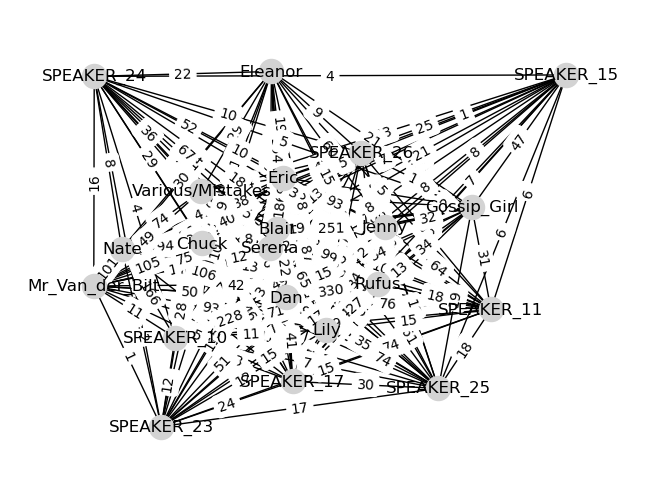

In [181]:
import matplotlib.pyplot as plt
from matplotlib.figure import _AxesStack

pos = nx.spring_layout(G, scale=2)
nx.draw(G, pos, node_color='lightgrey')
nx.draw_networkx_labels(G, pos);
nx.draw_networkx_edge_labels(G, pos, nx.get_edge_attributes(G, 'weight'));

# take care of margins
plot_margin = 0.25
x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin, x1 + plot_margin,
          y0 - plot_margin, y1 + plot_margin))
plt.axis('off');

In [101]:
nx.to_pandas_edgelist(G)

,source,target,weight
0,SPEAKER_17,Chuck,46
1,SPEAKER_17,SPEAKER_13,53
2,SPEAKER_17,Blair,115
3,SPEAKER_17,SPEAKER_25,30
4,SPEAKER_17,SPEAKER_09,44
...,...,...,...
247,SPEAKER_23,Eleanor,10
248,SPEAKER_23,Mr_Van_der_Bilt,1
249,Mr_Van_der_Bilt,Eleanor,30
250,Mr_Van_der_Bilt,SPEAKER_10,11


In [102]:
unweighted = G.degree()
weighted = G.degree(weight='weight')
bcent = nx.betweenness_centrality(G)
bcent

print(sorted(weighted))
#print(unweighted)

[('Blair', 3152), ('Chuck', 2078), ('Dan', 3162), ('Eleanor', 556), ('Eric', 1898), ('Gossip_Girl', 857), ('Jenny', 1542), ('Lily', 1484), ('Mr_Van_der_Bilt', 912), ('Nate', 1474), ('Rufus', 1866), ('SPEAKER_04', 1188), ('SPEAKER_09', 1642), ('SPEAKER_10', 992), ('SPEAKER_11', 642), ('SPEAKER_13', 2252), ('SPEAKER_15', 214), ('SPEAKER_17', 899), ('SPEAKER_23', 442), ('SPEAKER_24', 396), ('SPEAKER_25', 546), ('SPEAKER_26', 952), ('Serena', 3622)]


In [104]:
pairs = dict(nx.all_pairs_shortest_path_length(G))
pairs

{'SPEAKER_17': {'SPEAKER_17': 0,
  'SPEAKER_25': 1,
  'SPEAKER_11': 1,
  'Chuck': 1,
  'Serena': 1,
  'Eric': 1,
  'SPEAKER_15': 1,
  'Rufus': 1,
  'SPEAKER_23': 1,
  'SPEAKER_13': 1,
  'SPEAKER_26': 1,
  'Jenny': 1,
  'Dan': 1,
  'Blair': 1,
  'SPEAKER_24': 1,
  'SPEAKER_04': 1,
  'SPEAKER_09': 1,
  'Gossip_Girl': 1,
  'Nate': 1,
  'Mr_Van_der_Bilt': 1,
  'Lily': 1,
  'Eleanor': 1,
  'SPEAKER_10': 1},
 'Chuck': {'Chuck': 0,
  'SPEAKER_25': 1,
  'SPEAKER_11': 1,
  'Serena': 1,
  'Eric': 1,
  'Rufus': 1,
  'SPEAKER_15': 1,
  'SPEAKER_23': 1,
  'SPEAKER_13': 1,
  'SPEAKER_26': 1,
  'Jenny': 1,
  'Blair': 1,
  'Dan': 1,
  'SPEAKER_24': 1,
  'SPEAKER_04': 1,
  'SPEAKER_09': 1,
  'Gossip_Girl': 1,
  'SPEAKER_17': 1,
  'Nate': 1,
  'Mr_Van_der_Bilt': 1,
  'Lily': 1,
  'Eleanor': 1,
  'SPEAKER_10': 1},
 'SPEAKER_13': {'SPEAKER_13': 0,
  'SPEAKER_25': 1,
  'SPEAKER_11': 1,
  'Chuck': 1,
  'Serena': 1,
  'Eric': 1,
  'Rufus': 1,
  'SPEAKER_15': 1,
  'SPEAKER_23': 1,
  'SPEAKER_26': 1,
  'Jenny'

In [103]:
import pandas as pd
data = []
for c in sorted(pairs.keys()):
    data.append([pairs[c][d] for d in sorted(pairs.keys())])
pd.DataFrame(data, index=sorted(pairs.keys()), columns=sorted(pairs.keys()))

,Blair,Dan,Jenny,Lily,Mr_Van_der_Bilt,Nate,Rufus,SPEAKER_00,SPEAKER_04,SPEAKER_06,...,SPEAKER_17,SPEAKER_18,SPEAKER_19,SPEAKER_20,SPEAKER_22,SPEAKER_23,SPEAKER_24,SPEAKER_25,SPEAKER_26,Serena
Blair,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Dan,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Jenny,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Lily,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mr_Van_der_Bilt,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Nate,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Rufus,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SPEAKER_00,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
SPEAKER_04,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
SPEAKER_06,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [173]:
weighted = nx.betweenness_centrality(G)

data = [(c, weighted[c]) for c in G.nodes()]
pd.DataFrame(data, columns=('character', 'betweenness centrality'))

,character,betweenness centrality
0,SPEAKER_17,0.000277
1,Chuck,0.000277
2,Serena,0.000277
3,Various/Mistakes,0.000277
4,Eric,0.000277
5,SPEAKER_26,0.000277
6,Nate,0.000277
7,SPEAKER_25,0.000277
8,Jenny,0.000277
9,Blair,0.000277


In [164]:
nx.pagerank(G)

{'SPEAKER_17': 0.031725270348564094,
 'Chuck': 0.062206819247446345,
 'Serena': 0.1543648729776761,
 'SPEAKER_09': 0.050895455917287745,
 'Eric': 0.058006599994694034,
 'SPEAKER_26': 0.032101639859743125,
 'Nate': 0.04646675258872571,
 'SPEAKER_25': 0.02207609363176151,
 'Jenny': 0.0483797311106297,
 'Blair': 0.10728569895935015,
 'Lily': 0.046649903829161274,
 'Gossip_Girl': 0.031101202656796903,
 'SPEAKER_15': 0.013055208967600488,
 'Rufus': 0.0571873039945114,
 'Dan': 0.09063164314425337,
 'SPEAKER_11': 0.024575964034406095,
 'SPEAKER_24': 0.017702073451645955,
 'SPEAKER_23': 0.018866280007973652,
 'Mr_Van_der_Bilt': 0.031400002238774524,
 'SPEAKER_10': 0.03325094076565816,
 'Eleanor': 0.022070542273339745}